# KNMI daggegevens

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

### Get the data

In [2]:
!ls ../datasets/knmi

etmgeg_260.txt etmgeg_279.txt


In [3]:
filename_260 = '../datasets/knmi/etmgeg_260.txt'
filename_279 = '../datasets/knmi/etmgeg_279.txt'

In [177]:
nrows_header = 51
df_260 = pd.read_csv(filename_260, skiprows=nrows_header, low_memory=False, skipinitialspace=True, dtype='string')
df_279 = pd.read_csv(filename_279, skiprows=nrows_header, low_memory=False, skipinitialspace=True, dtype='string')

In [178]:
df_260.rename(columns = lambda s: s.strip('# '), inplace = True)
df_279.rename(columns = lambda s: s.strip('# '), inplace = True)

In [179]:
df_260.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45077 entries, 0 to 45076
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STN       45077 non-null  string
 1   YYYYMMDD  45077 non-null  string
 2   DDVEC     43952 non-null  string
 3   FHVEC     43952 non-null  string
 4   FG        43952 non-null  string
 5   FHX       43952 non-null  string
 6   FHXH      43952 non-null  string
 7   FHN       43952 non-null  string
 8   FHNH      43952 non-null  string
 9   FXX       26449 non-null  string
 10  FXXH      26449 non-null  string
 11  TG        45077 non-null  string
 12  TN        45077 non-null  string
 13  TNH       26815 non-null  string
 14  TX        45077 non-null  string
 15  TXH       26815 non-null  string
 16  T10N      19510 non-null  string
 17  T10NH     11192 non-null  string
 18  SQ        45047 non-null  string
 19  SP        45047 non-null  string
 20  Q         24442 non-null  string
 21  DR        34

In [180]:
df_279.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12935 entries, 0 to 12934
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STN       12935 non-null  string
 1   YYYYMMDD  12935 non-null  string
 2   DDVEC     12366 non-null  string
 3   FHVEC     12366 non-null  string
 4   FG        12370 non-null  string
 5   FHX       12348 non-null  string
 6   FHXH      12344 non-null  string
 7   FHN       12348 non-null  string
 8   FHNH      12348 non-null  string
 9   FXX       12092 non-null  string
 10  FXXH      12092 non-null  string
 11  TG        12573 non-null  string
 12  TN        12568 non-null  string
 13  TNH       12568 non-null  string
 14  TX        12568 non-null  string
 15  TXH       12568 non-null  string
 16  T10N      12531 non-null  string
 17  T10NH     11156 non-null  string
 18  SQ        12144 non-null  string
 19  SP        12144 non-null  string
 20  Q         12580 non-null  string
 21  DR        11

## Select columns of interest

In [181]:
columns = ['STN','YYYYMMDD','TG']

df_260 = df_260[columns].copy()
df_279 = df_279[columns].copy()

## Data types

In [182]:
df_260.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45077 entries, 0 to 45076
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STN       45077 non-null  string
 1   YYYYMMDD  45077 non-null  string
 2   TG        45077 non-null  string
dtypes: string(3)
memory usage: 1.0 MB


In [183]:
df_260['dd'] = pd.to_datetime(df_260['YYYYMMDD'], format='%Y%m%d')
df_279['dd'] = pd.to_datetime(df_279['YYYYMMDD'], format='%Y%m%d')

## Select rows on year

In [184]:
year = 2023
df_260 = df_260[df_260['dd'].dt.year == year].copy()
df_279 = df_279[df_279['dd'].dt.year == year].copy()

## Samenvoegen

In [185]:
df = pd.concat([df_260, df_279]).reset_index(drop = True)

In [186]:
df

,STN,YYYYMMDD,TG,dd
0,260,20230101,124,2023-01-01
1,260,20230102,88,2023-01-02
2,260,20230103,63,2023-01-03
3,260,20230104,116,2023-01-04
4,260,20230105,108,2023-01-05
...,...,...,...,...
725,279,20231227,53,2023-12-27
726,279,20231228,104,2023-12-28
727,279,20231229,87,2023-12-29
728,279,20231230,69,2023-12-30


## Temperatuur waarden bijwerken

In [187]:
df['TG'] = df['TG'].astype('int') / 10

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STN       730 non-null    string        
 1   YYYYMMDD  730 non-null    string        
 2   TG        730 non-null    float64       
 3   dd        730 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), string(2)
memory usage: 22.9 KB


## Stations bijwerken

In [190]:
stations = {
    260: 'De Bilt',
    279: 'Hoogeveen'
}

df['station'] = df['STN'].astype('int').replace(stations)
station_names = list(stations.values())

In [191]:
df

,STN,YYYYMMDD,TG,dd,station
0,260,20230101,12.4,2023-01-01,De Bilt
1,260,20230102,8.8,2023-01-02,De Bilt
2,260,20230103,6.3,2023-01-03,De Bilt
3,260,20230104,11.6,2023-01-04,De Bilt
4,260,20230105,10.8,2023-01-05,De Bilt
...,...,...,...,...,...
725,279,20231227,5.3,2023-12-27,Hoogeveen
726,279,20231228,10.4,2023-12-28,Hoogeveen
727,279,20231229,8.7,2023-12-29,Hoogeveen
728,279,20231230,6.9,2023-12-30,Hoogeveen


## Drop columns

In [192]:
df.drop(['STN','YYYYMMDD'], axis = 1, inplace = True)

In [193]:
df

,TG,dd,station
0,12.4,2023-01-01,De Bilt
1,8.8,2023-01-02,De Bilt
2,6.3,2023-01-03,De Bilt
3,11.6,2023-01-04,De Bilt
4,10.8,2023-01-05,De Bilt
...,...,...,...
725,5.3,2023-12-27,Hoogeveen
726,10.4,2023-12-28,Hoogeveen
727,8.7,2023-12-29,Hoogeveen
728,6.9,2023-12-30,Hoogeveen


## Pivot

In [194]:
df_pivot = pd.pivot(df, index='dd', columns='station', values='TG')
df_pivot

station,De Bilt,Hoogeveen
dd,,
2023-01-01,12.4,12.2
2023-01-02,8.8,8.4
2023-01-03,6.3,5.1
2023-01-04,11.6,10.8
2023-01-05,10.8,9.7
...,...,...
2023-12-27,7.0,5.3
2023-12-28,10.9,10.4
2023-12-29,9.3,8.7


## Plot

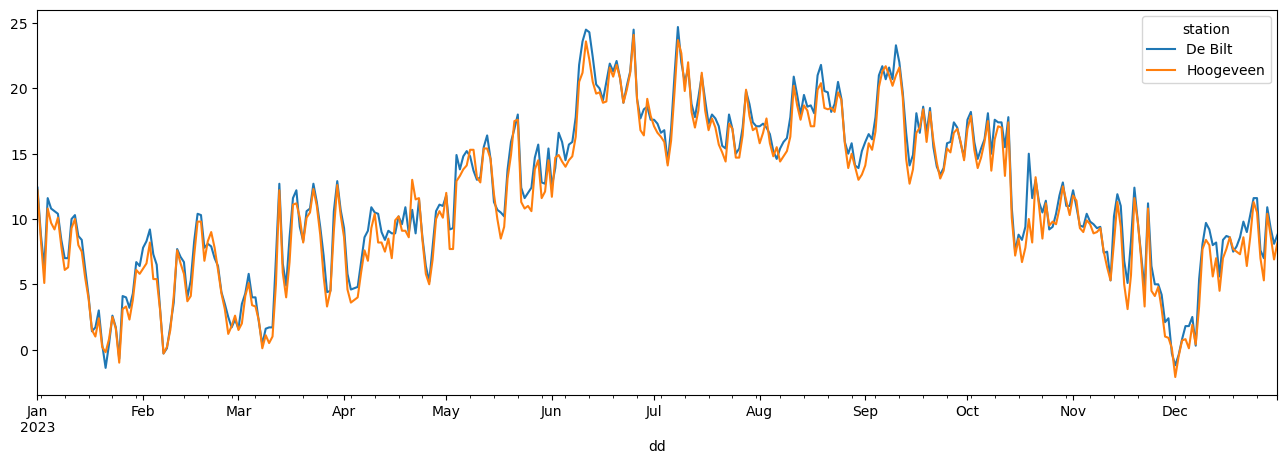

In [221]:
df_pivot.plot(kind = 'line', figsize = (16, 5));

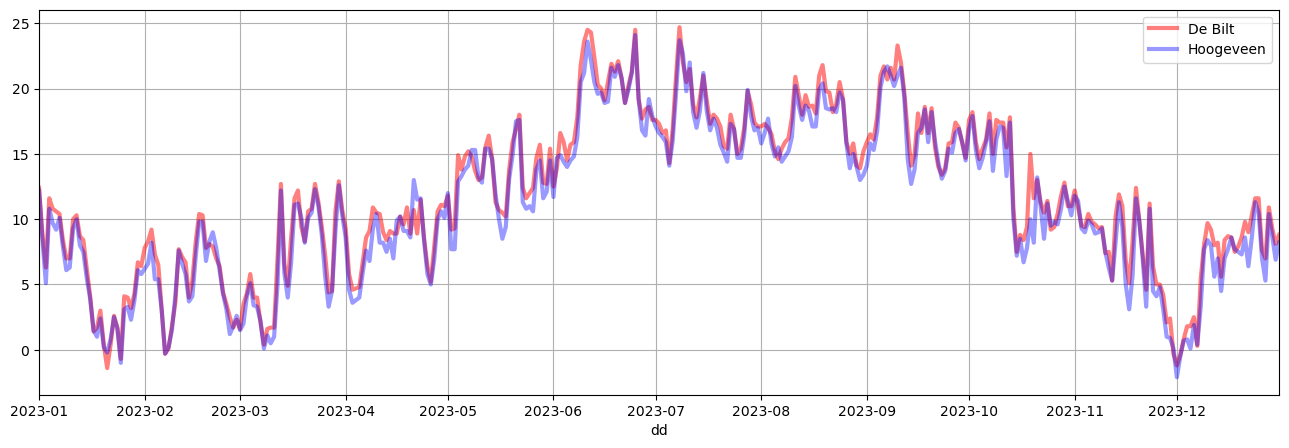

In [222]:
fig, ax = plt.subplots(figsize = (16, 5))

column_name = station_names[0]
ax.plot(df_pivot.index, 
        df_pivot[column_name], 
        color='red', 
        alpha = 0.5, 
        linewidth = 3, 
        linestyle = 'solid', 
        label = column_name)

column_name = station_names[1]
ax.plot(df_pivot.index, 
        df_pivot[column_name], 
        color='blue', 
        alpha = 0.4, 
        linewidth = 3, 
        linestyle = 'solid', 
        label = column_name)

ax.set_xlim(np.min(df_pivot.index), np.max(df_pivot.index))

ax.set_xlabel('dd')

plt.legend()
plt.grid()

plt.show()

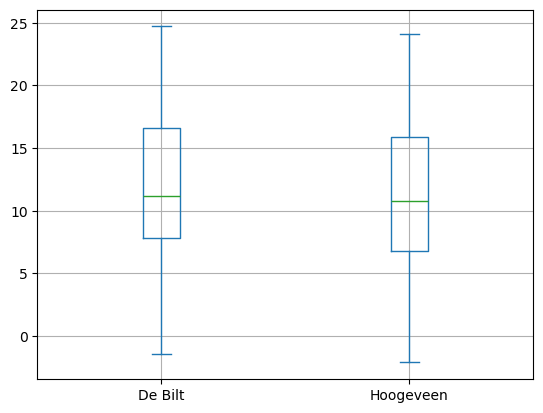

In [223]:
df_pivot.plot(kind='box')

plt.grid()
plt.show()

In [224]:
df_pivot.describe()

station,De Bilt,Hoogeveen
count,365.000000,365.000000
mean,11.790959,11.115890
std,5.939392,5.949173
min,-1.400000,-2.100000
25%,7.800000,6.800000
50%,11.200000,10.800000
75%,16.600000,15.900000
max,24.700000,24.100000


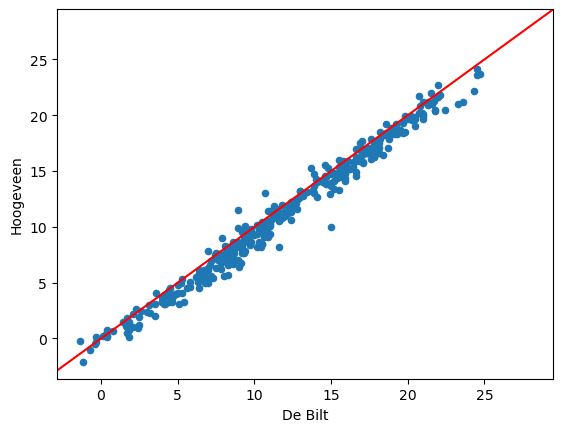

In [228]:
df_pivot.plot(kind = 'scatter', x = station_names[0], y = station_names[1])
plt.axline([0,0], [28,28], color = 'red')
plt.show()

In [229]:
n_days_colder = np.sum(data[station_names[1]] < data[station_names[0]])
print(f'In {year} was het is {n_days_colder} dagen van het jaar kouder {station_names[1]} in {station_names[0]}')

In 2023 was het is 308 dagen van het jaar kouder Hoogeveen in De Bilt


## Temperatuurverschil

In [230]:
diff = data[station_names[1]] - data[station_names[0]]

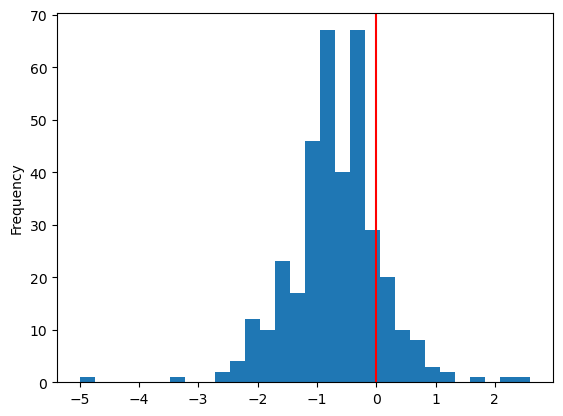

In [231]:
diff.plot(kind = 'hist', bins = 30)
plt.axvline(0, color = 'red')
plt.show()

In [233]:
diff.describe()

count    365.000000
mean      -0.675068
std        0.776515
min       -5.000000
25%       -1.100000
50%       -0.700000
75%       -0.300000
max        2.600000
dtype: float64

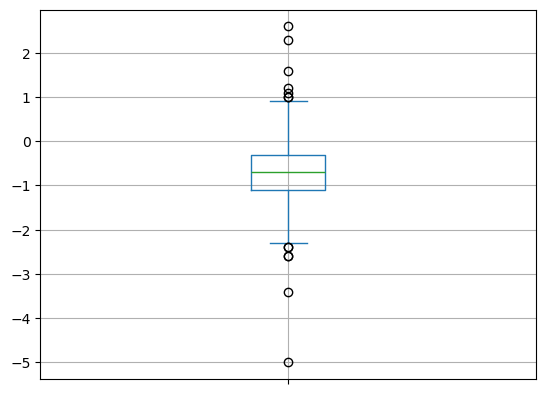

In [238]:
diff.plot.box()
plt.grid()
plt.show()

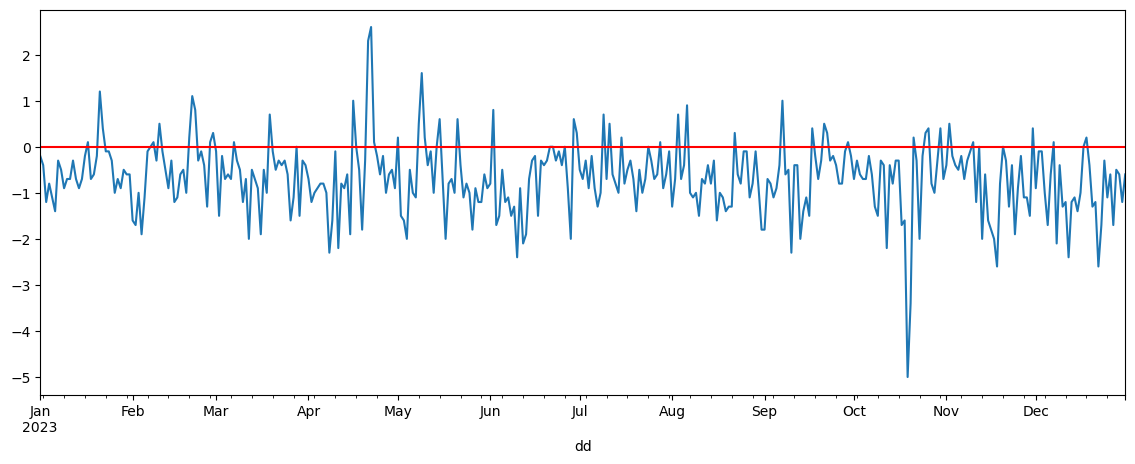

In [239]:
diff.plot(kind = 'line', figsize = (14, 5))
plt.axhline(0, color = 'red')
plt.show()

## Normal distribution? Q-Q plot

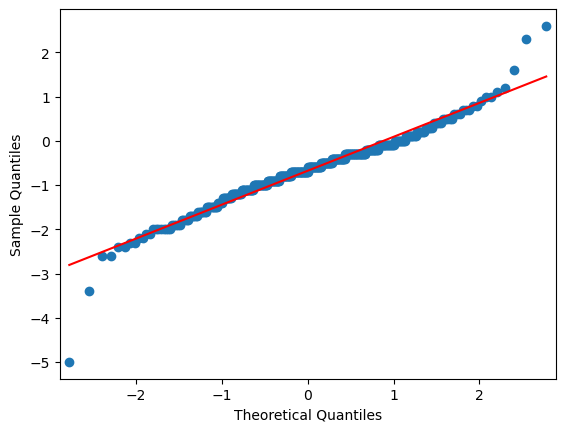

In [244]:
from statsmodels.graphics.api import qqplot

qqplot(diff, line='r')

plt.show()

## Student t-test

In [247]:
from scipy import stats

t, p = stats.ttest_1samp(diff, 0)

print("The t-statistic is %.3f and the p-value is %.5f." % (t, p/2))

The t-statistic is -16.609 and the p-value is 0.00000.
